In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Advertising_SLR_SNLR_ONE_INPUT_27TH_FEB.csv")
df=df.drop("Unnamed: 0",axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
#  EDA - exploratory data analysis

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


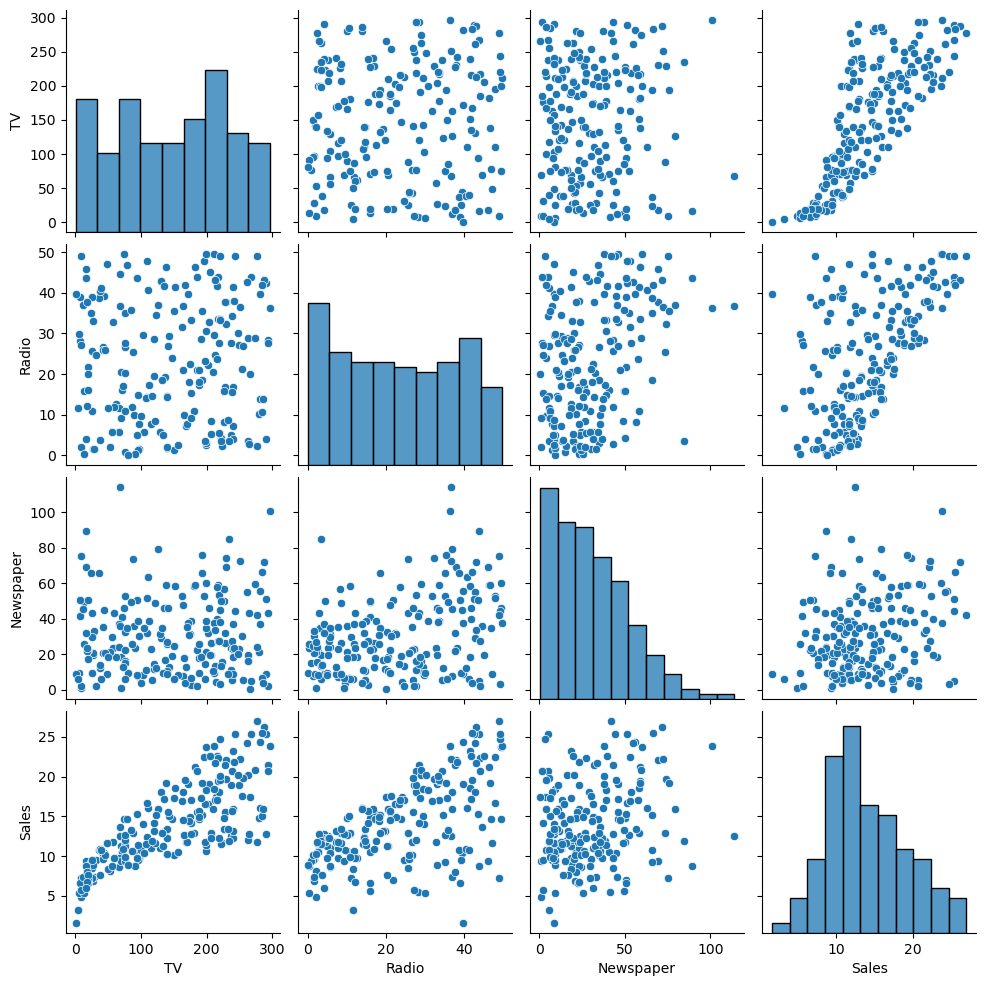

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
df.corr()   
# we can drop the feature(column) if it is less than 0.2     

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [9]:
df[["TV","Radio","Newspaper"]].skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
dtype: float64

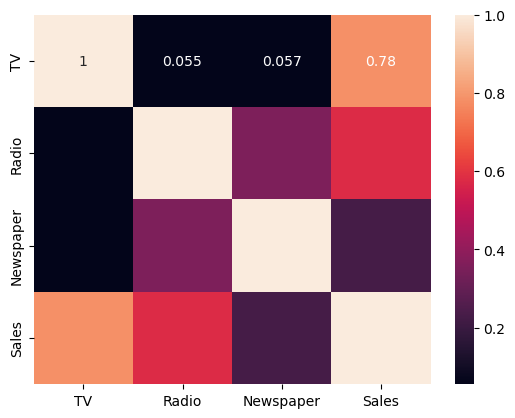

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.show()

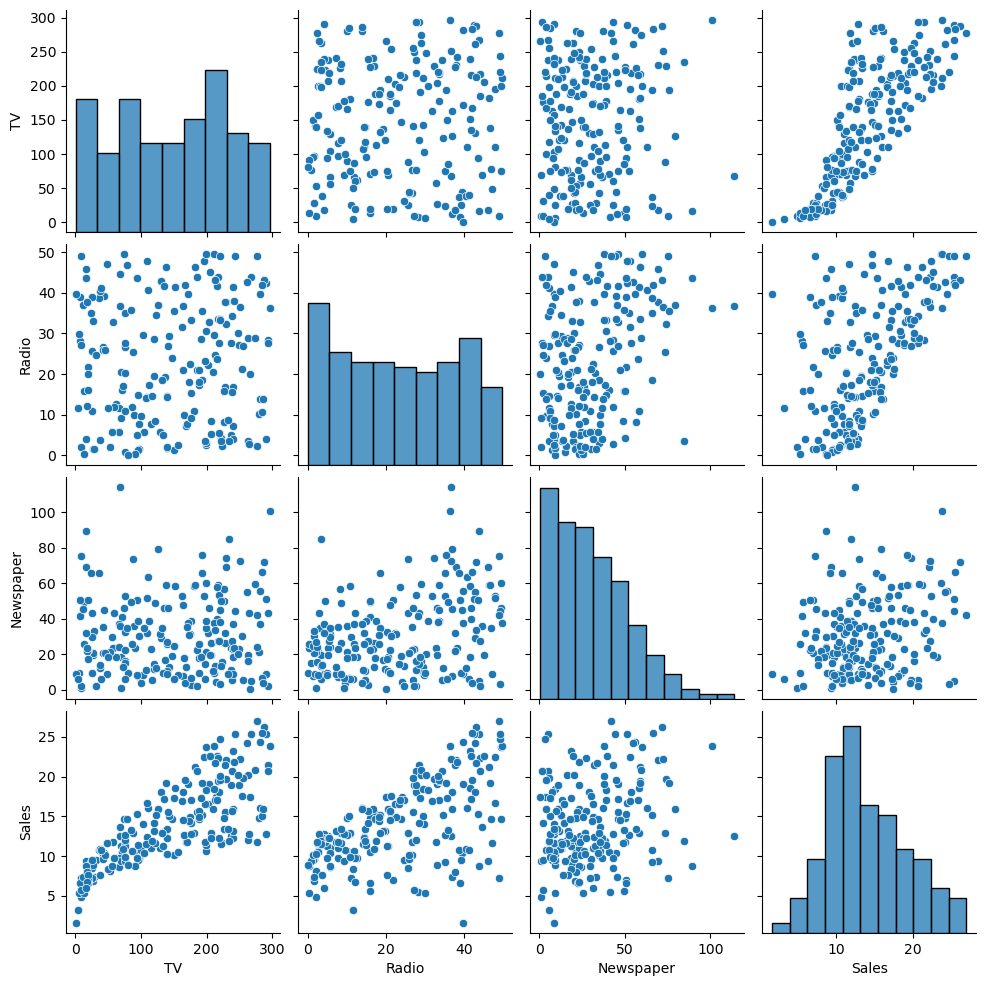

In [11]:
sns.pairplot(df)

In [12]:
# data understanding completed....
# now its time to data cleaning...

In [13]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [14]:
# data wrangling...create x and y....

In [15]:
x = df.drop("Sales",axis=1)
y = df["Sales"]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [16]:
train_r2 = []
cv = []
test_r2 = []

for i in range(0,110):
    
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=i)
    
    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(x_train,y_train)

    ypred_train = model.predict(x_train)
    ypred_test = model.predict(x_test)
    
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(model,x_train,y_train,cv=5).mean())
    
    from sklearn.metrics import r2_score
    train_r2.append(r2_score(y_train,ypred_train))
    test_r2.append(r2_score(y_test,ypred_test))
    
em =pd.DataFrame({"train_r2":train_r2,"cv":cv,"test_r2":test_r2})

# for best random state number...just check train == cv or not

gm = em[(abs(em["test_r2"]-em["cv"])<=0.05)] 

# Difference b/w train and cv must be less than 0.05 itself

rs=gm[gm["test_r2"]==gm["test_r2"].max()].index.tolist()[0]

rs
# best random state number is  [ rs = 10] will come

99

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state =99) # we can write True also for random state

In [18]:
# modelling...
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train) # there is transform attribute for linear regression

LinearRegression()

# Sales=50+10×Advertising_Expenditure

# Intercept (𝛽0): 50. This means that if the advertising expenditure is zero, the expected amount of sales would be 50 units.
# Slope (𝛽1): 10. This indicates that for each additional unit of advertising expenditure, the sales are expected to increase by 10 units

In [19]:
print("coefficient ",model.coef_)
print("intercept",model.intercept_)

coefficient  [0.04550574 0.18820547 0.00075244]
intercept 2.9044859140769255


In [20]:
# coefficient  [ 0.0437726   0.19343299 -0.00222879] with best parameters
# intercept 3.254097114418883

In [21]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [22]:
ypred_train = model.predict(x_train)

from sklearn.metrics import mean_squared_error,r2_score
print("train_RMSE ",np.sqrt(mean_squared_error(y_train,ypred_train)))

print("train_R2 ",r2_score(y_train,ypred_train)) # 74% regression is fitting

train_RMSE  1.7236824822650754
train_R2  0.8906288862925659


In [23]:
# train_RMSE  1.3633035872281898
# train_R2  0.9209087553499528

In [24]:
from sklearn.model_selection import cross_val_score
print("cv_score ",cross_val_score(model,x_train,y_train,cv=5).mean()) #cv=5 means 80% of data, if train size is 75%, then cv must be 4 its fix 

cv_score  0.8745389851558864


In [25]:
# cv_score  0.9157327701186169

# r2_score or model.score both are equal...the only change in orgaments passing

In [26]:
print(r2_score(y_train,ypred_train)) # train or test data

0.8906288862925659


In [27]:
# r2_score : 0.9209087553499528

In [28]:
print(model.score(x_train,y_train)) # train or test data

0.8906288862925659


In [29]:
# model.score : 0.9209087553499528

In [30]:
ypred_test = model.predict(x_test)

print("Test RMSE",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Test R2 ",r2_score(y_test,ypred_test)) #vone condition was not executed

Test RMSE 1.4312783138301641
Test R2  0.9200846680148507


In [31]:
# Test RMSE 2.58852984462781
# Test R2  0.8353672324670594

In [32]:
# train and test
# train and cv 
# business problem....these conditions must be satisfy...
# sales = beta-1 * x + beta-0
sales = 0.04784052*200 + 4.389814518436085
print("sales will be done",sales) # sales will be done with +/- Test RMSE value(2.422)

sales will be done 13.957918518436085


In [33]:
# storing purpose

from joblib import dump
dump(model,"sales_raj.joblib")

['sales_raj.joblib']

In [34]:
# for loading purpose

from joblib import load
client_model = load("sales_raj.joblib")

In [35]:
client_model.predict([[200,300,500]])

array([68.84349338])

# line assumptions only for linear regression
# here consider only train data....

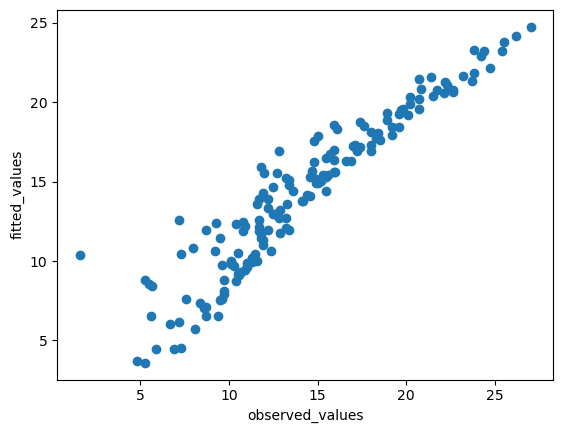

In [36]:
error = y_train - ypred_train
plt.scatter(y_train,ypred_train)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

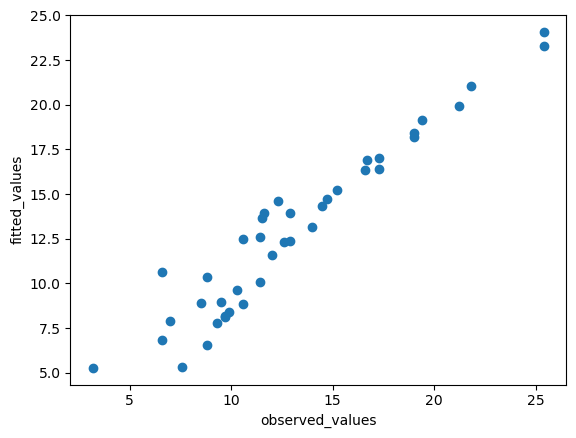

In [37]:
test_error = y_test - ypred_test
plt.scatter(y_test,ypred_test)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()


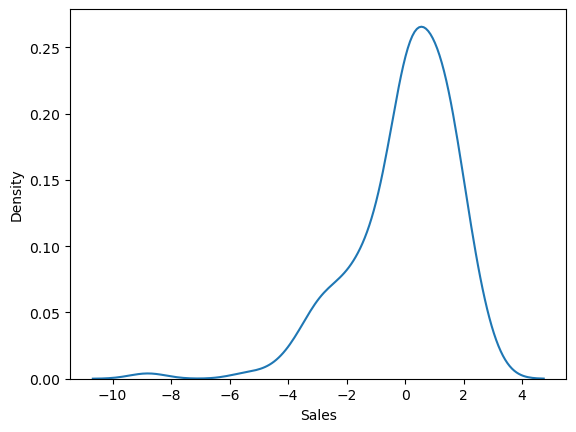

In [38]:
# normality of error
sns.kdeplot(error)
plt.show()

In [39]:
# Normality checking
error.skew()

-1.3993035801081148

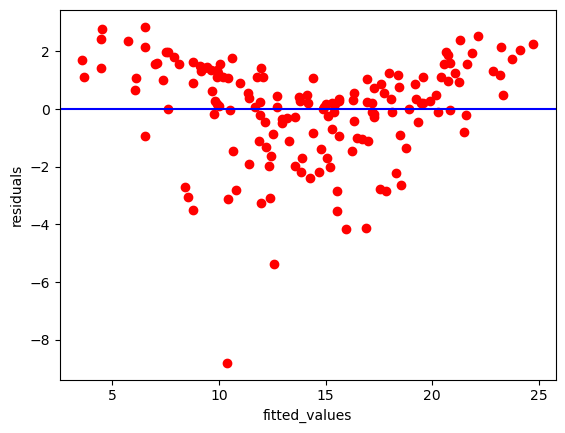

In [40]:
# Equal variance ....

plt.scatter(ypred_train,error,c="r") # color red
plt.axhline(y=0,color="blue") #at line at y=0
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()

In [41]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [42]:
# independent of variables...for that apply f _test/ anova test 

from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size=0.8,random_state=99)

import statsmodels.formula.api as smf
model1=smf.ols("y_train~x_train",data=df_train).fit() # ~ means verses
model1.summary()
#df_train.count() / shape

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     423.4
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           1.02e-74
Time:                        17:40:50   Log-Likelihood:                -314.14
No. Observations:                 160   AIC:                             636.3
Df Residuals:                     156   BIC:                             648.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9045      0.369      7.877      0.000       2.176       3.633
x_train[0]     0.0455      0.002     28.499      0.000       0.042       0.049
x_train[1]     0.1882      0.010     18.941      0.000       0.169       0.208
x_train[2]     0.0008      0.007      0.114      0.909      -0.012       0.014
==============================================================================
Omnibus:                       53.148   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.731
Skew:                          -1.386   Prob(JB):                     5.54e-30
Kurtosis:                       6.539   Cond. No.                         475.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Added variable plot(AV plot)
**partial differentiation instead differentiation**

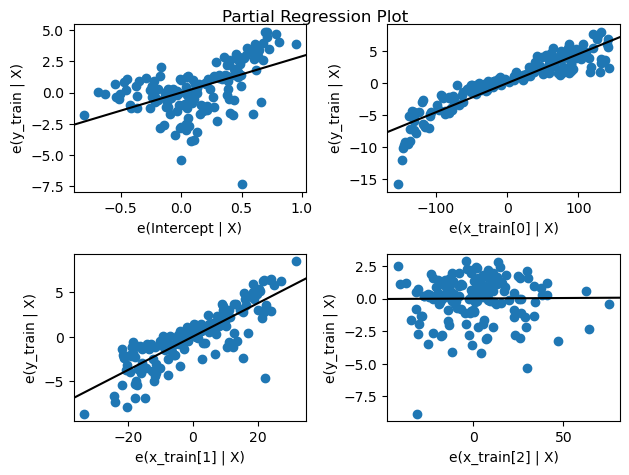

In [43]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)
plt.show()

# from the above r_square is positive means regression is better than avg...

**e(x_train[0/1/2])..these r means inputs, y_train|x means sales col...in that three are linear as per line in first 3 graphs..**
**third input(x_train[2]) is not supporting regression...it supports avg, so that input will be removed and say to client that,dont invest on newspaper**

In [44]:
 # final conclusion...
 # 1 unit increase in total spend is associated with an increase of 0.04784(slope) units in sales
#  this means for every 10,000 dollars spent on ads..we could expert 478 more units sold.


In [45]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [46]:
x=x.drop("Newspaper",axis=1) # x=x.drop(Columns=["Newspaper"])

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state =10)

model2=LinearRegression()
model2.fit(x_train,y_train)
ypred_train=model2.predict(x_train)
ypred_test=model2.predict(x_test)
print("train_r2",r2_score(y_train,ypred_train))
print("cv_score",cross_val_score(model2,x_train,y_train,cv=5).mean())
print("test_r2",r2_score(y_test,ypred_test))


train_r2 0.9208213397821704
cv_score 0.9159486273309956
test_r2 0.8354496662944217


# Still we dont get rid off from overfitting problem, so for that we do

# drop the influential records...
#df.drop(index=[5,130],inplace=True) # removes 5th and 130th records only(considered as out liers)

df

In [47]:
x=df.drop(columns=["Sales","Newspaper"]) # no need of axis here...directly mentioned the columns right
y=df["Sales"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state =10)

model2=LinearRegression()
model2.fit(x_train,y_train)
ypred_train=model2.predict(x_train)
ypred_test=model2.predict(x_test)
print("train_r2",r2_score(y_train,ypred_train))
print("cv_score",cross_val_score(model2,x_train,y_train,cv=5).mean())
print("test_r2",r2_score(y_test,ypred_test)) # check the above condition,  in that two recprds should be removed for the below over fitting problem

train_r2 0.9208213397821704
cv_score 0.9159486273309956
test_r2 0.8354496662944217


# Note:
- **slope(beta-1)** value is nothing but i unit value in toptal spend
- if alpha(level of significance) or p-value is less than 0.05 then it can be removed to get better accuracy
- if the corr(input ~ output) is less than 0.2(20%) then it can be removed to get better accuracy
- instead of dropping columns, drop influential records(not out liers...disturbing records) drop just few records
- train = cv
- test = train
- All LINE Assumptions must be satisfy
- u hv to submit perfect one to the client...no sry excuses or requests cross validation must be clear by ur side
- last option is to delete the columns which r not required...
- low correlation(input ~ output) means low accuracy...
- if the corr b/w any 2 indeoendent variables is >=0.8, then it is called as colinearity problem
- solution is drop 1 out 2
- we will get colinearity problem when we do dummy encoding thats y in that we will drop the first column by using drop first instruction in dummy encodding in order to colinearity problem...

In [48]:
df1=pd.DataFrame({"TV":[200],"Radio":[100],"Newspaper":[700]})
df1

,TV,Radio,Newspaper
0,200,100,700


In [49]:
# Data preprocessing 
df1.drop(columns="Newspaper",inplace=True)

model2.predict(df1)

array([31.20362737])

# **Multi non-linear regression..**

In [50]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [51]:
x = df.drop("Sales",axis=1)
y = df["Sales"]


In [52]:
train_r2 = []
cv = []
test_r2 = []

for i in range(0,100):
    
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=i)
    
    from sklearn.linear_model import LinearRegression
    model=LinearRegression()
    model.fit(x_train,y_train)

    ypred_train = model.predict(x_train)
    ypred_test = model.predict(x_test)

    cv.append(cross_val_score(model,x_train,y_train,cv=5).mean())
    
    from sklearn.metrics import r2_score
    train_r2.append(r2_score(y_train,ypred_train))
    test_r2.append(r2_score(y_test,ypred_test))
    
em =pd.DataFrame({"train_r2":train_r2,"cv":cv,"test_r2": test_r2})

# for best random state number...just check train == cv or not

gm = em[(abs(em["test_r2"]-em["cv"])<=0.05)] 

# Difference b/w train and cv must be less than 0.05 itself

rs=gm[gm["cv"]==gm["cv"].max()].index.tolist()[0]

rs
# best random state number is  [ rs = 10 ]
    
    


0

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=rs)

from sklearn.preprocessing import PolynomialFeatures
polynomial_convertor=PolynomialFeatures(degree = 2,include_bias=False)
x_train_poly = polynomial_convertor.fit_transform(x_train)
x_test_poly = polynomial_convertor.transform(x_test)


from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(x_train_poly,y_train)

ypred_train = model2.predict(x_train_poly)
ypred_test = model2.predict(x_test_poly)

print("cv_score",cross_val_score(model,x_train_poly,y_train,cv=5).mean())

from sklearn.metrics import r2_score
print("train r2 score ",r2_score(y_train,ypred_train))
print("test_r2",r2_score(y_test,ypred_test))


cv_score 0.9873126496278797
train r2 score  0.9902824453123369
test_r2 0.9715371723181649


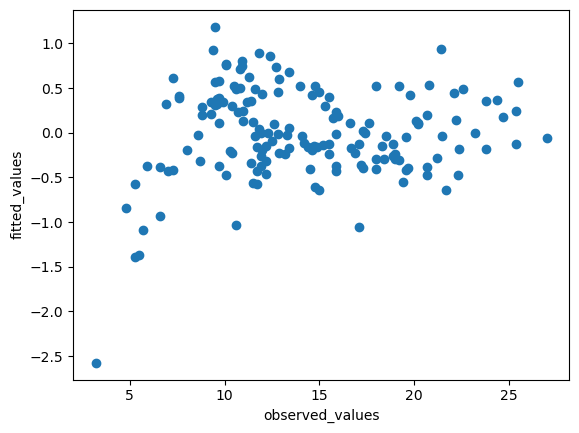

In [54]:
error = y_train - ypred_train
plt.scatter(y_train,error)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

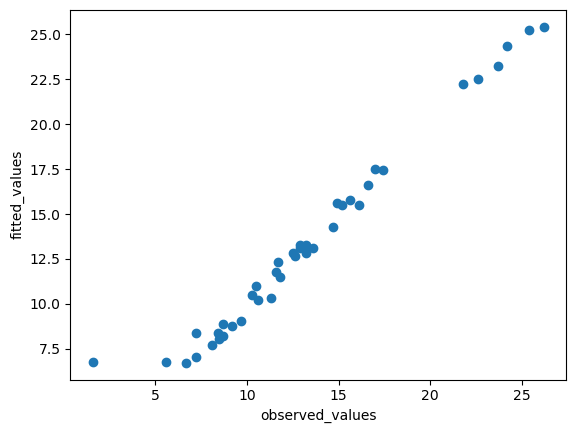

In [55]:
test_error = y_test - ypred_test
plt.scatter(y_test,ypred_test)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

In [56]:
error.skew()

-0.9584293425425415

# For line assumptions error...checking Added variable(Av) plot

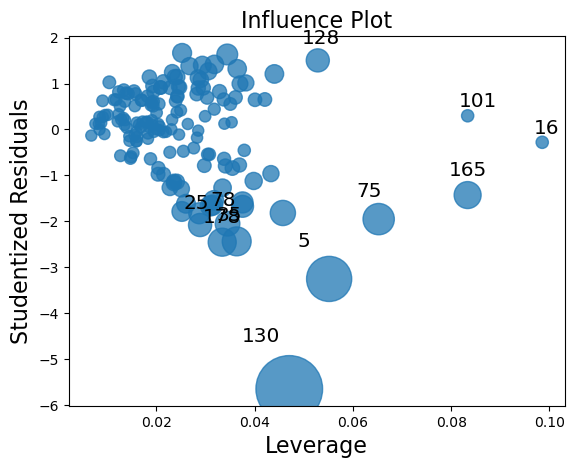

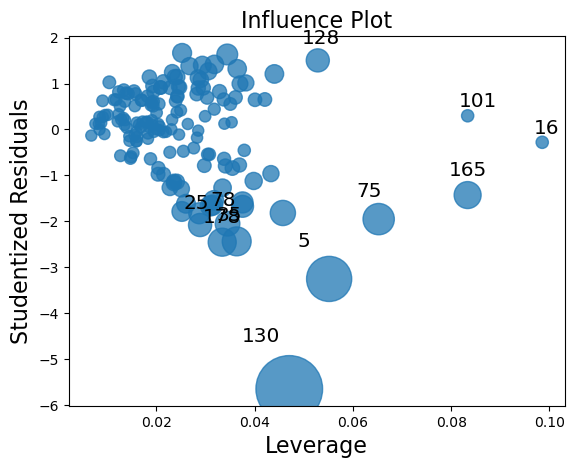

In [57]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1) # model is from smf is nothing but f test

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=rs)

from sklearn.preprocessing import PolynomialFeatures
polynomial_convertor=PolynomialFeatures(degree = 2,include_bias=False)
x_train_poly = polynomial_convertor.fit_transform(x_train)
x_test_poly = polynomial_convertor.transform(x_test)


from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(x_train_poly,y_train)

ypred_train = model2.predict(x_train_poly)
ypred_test = model2.predict(x_test_poly)

print("cv_score",cross_val_score(model,x_train_poly,y_train,cv=5).mean())

from sklearn.metrics import r2_score
print("train r2 score ",r2_score(y_train,ypred_train))
print("test_r2",r2_score(y_test,ypred_test))

cv_score 0.9873126496278797
train r2 score  0.9902824453123369
test_r2 0.9715371723181649


In [59]:
df1=df

In [60]:

df.drop("Newspaper",axis=1,inplace=True)
df

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


In [61]:
df1

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


In [62]:
# independent of variables...for that apply f _test/ anova test 

from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size=0.8,random_state=0)

import statsmodels.formula.api as smf
model3=smf.ols("y_train~x_train",data=df_train).fit() # ~ means verses
model3.summary()
#df_train.count() / shape

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     505.4
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           4.23e-80
Time:                        17:41:02   Log-Likelihood:                -297.29
No. Observations:                 160   AIC:                             602.6
Df Residuals:                     156   BIC:                             614.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9949      0.330      9.076      0.000       2.343       3.647
x_train[0]     0.0446      0.001     30.212      0.000       0.042       0.047
x_train[1]     0.1965      0.009     21.994      0.000       0.179       0.214
x_train[2]    -0.0028      0.006     -0.451      0.653      -0.015       0.009
==============================================================================
Omnibus:                       13.557   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.174
Skew:                          -0.754   Prob(JB):                     0.000507
Kurtosis:                       2.990   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

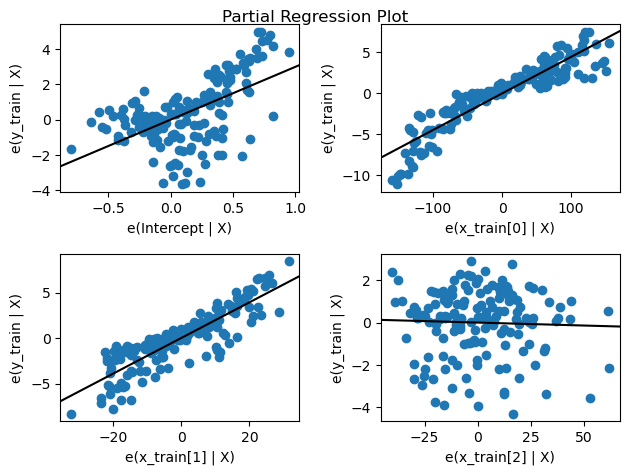

In [63]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model3)
plt.show()

In [64]:
#df.drop(index=[5,130],inplace = True)
df

,TV,Radio,Sales
0,230.1,37.8,22.1
1,44.5,39.3,10.4
2,17.2,45.9,9.3
3,151.5,41.3,18.5
4,180.8,10.8,12.9
...,...,...,...
195,38.2,3.7,7.6
196,94.2,4.9,9.7
197,177.0,9.3,12.8
198,283.6,42.0,25.5


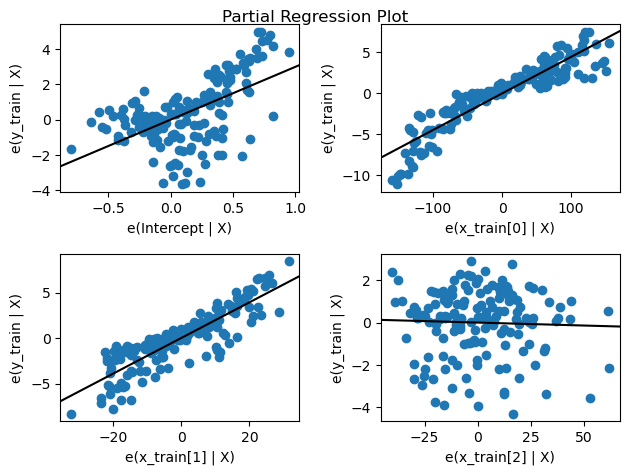

In [65]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model3)
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size=0.8,random_state=0)

import statsmodels.formula.api as smf
model3=smf.ols("y_train~x_train",data=df_train).fit() # ~ means verses
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     505.4
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           4.23e-80
Time:                        17:41:04   Log-Likelihood:                -297.29
No. Observations:                 160   AIC:                             602.6
Df Residuals:                     156   BIC:                             614.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9949      0.330      9.076      0.000       2.343       3.647
x_train[0]     0.0446      0.001     30.212      0.000       0.042       0.047
x_train[1]     0.1965      0.009     21.994      0.000       0.179       0.214
x_train[2]    -0.0028      0.006     -0.451      0.653      -0.015       0.009
==============================================================================
Omnibus:                       13.557   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.174
Skew:                          -0.754   Prob(JB):                     0.000507
Kurtosis:                       2.990   Cond. No.                         468.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""